## Logistic Regression (Binary Classification)

### Business Problem Definition
The business problem revolves around **predicting the likelihood of order cancellations** for a product fulfillment company based on historical order data. This prediction helps the company:

- Proactively address potential cancellations,
- Optimize operations, and
- Improve customer satisfaction.

By identifying high-risk orders early, the business can take preventive actions, such as offering incentives or expedited shipping, to reduce the likelihood of cancellations.

This is a binary classification problem where the target variable is the Order_Cancelled column.

The model needs to classify whether an order will be cancelled based on features like the delivery time, order value, region, and other order-related factors.

---

### Dataset Description

#### Target Variable:
- **Order_Cancelled** (binary categorical):  
  The binary target variable indicating whether an order was cancelled (`1`) or not cancelled (`0`).  
  This is the variable that the classification model will predict based on the other feature columns.

---

#### Feature Columns:

Explanation of Attributes/Target Variable:

\
Each row represents an `order placed by the customer` while columms represent the varied specifics of that order.

\

- `Days_to_Delivery` (numeric):  
  The number of days it takes for the order to be delivered, generated based on a normal distribution with a mean of 5 days and a standard deviation of 2 days.

- `Num_Items_Ordered` (numeric):  
  The total number of items in the order, represented as an integer between 1 and 20, reflecting the quantity of products ordered.

- `Order_Value` (numeric):  
  The total value of the order in USD. It is generated from a normal distribution centered around $500, with a standard deviation of $100.

- `Discount_Rate` (numeric):  
  The discount rate applied to the order, represented as a value between 0 and 0.5, indicating various discounts offered during sales.

- `Num_Previous_Orders` (numeric):  
  The number of previous orders placed by the customer. It is an integer between 0 and 10.

- `Delivery_Time_Variation` (numeric):  
  The variation between the estimated and actual delivery time, measured in days, with values ranging from 0 to 3 days.

- `Region` (categorical):  
  The geographic region of the customer. Possible values:
  - North America
  - EMEA (Europe, Middle East, Africa)
  - APAC (Asia-Pacific)
  - LATAM (Latin America)

- `Product_Category` (categorical)
  The category of the product ordered. Possible values:
  - Cloud
  - On-premise
  - SaaS (Software as a Service)
  - Hardware

- `Order_Priority` (categorical):  
  The urgency level of the order. Possible values:
  - Low
  - Medium
  - High

- `Payment_Method` (categorical):  
  The method used for payment in the order. Possible values include:
  - Credit Card
  - Bank Transfer
  - PayPal
  - Bitcoin

- `Correlated_Order_Value` (numeric):  
  Represents an alternative estimation of the total order value, calculated by factoring in **historical customer spending behavior** and **product pricing trends**.It incorporates additional business insights such as customer loyalty and purchasing history.


- `Order_Cancelled (Target):` This is the target column indicating whether the order was cancelled or not. Values are "Cancelled" or "Not-Cancelled".

---


### Comprehensive Data Science Project Workflow: From Business Understanding to Model Monitoring:

1. `Business Understanding` (Define project goals and objectives.)

2. `Data Requirement` (Identify necessary data for analysis)

3. `Data Collection` (Data gathering from different sources with varied tools and technologies)

4. `Data Preparation` (EDA/Data Preparation/Data Cleaning/Data Munging)

5. `Data Modeling` ( Clean Data + Algorithms = Model)

6. `Model Evaluation`  (Test Model perf)

7. `Model Tuning`(Optimize model hyperparameters)

8. `Model Deployment`(Deploy model for real-time use)

9. `Monitoring`(Track model performance over time)

---

### EDA/ Data Preparation/Data Cleaning Steps:

1. `Removing Duplicate data`
2. `Missing Value Treatment`
3. `Outlier Treatment`
4. `Categorical to Numerical Conversion`
5. `Numerical to Categorical Conversion`
6. `Feature Scaling`
7. `Feature Transformation`
8. `Feature selection`

---

In [2]:
%pip install shap statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 15.1 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Load the dataset from the uploaded file
file_path = './datasets/order_mgmt_binary_class_high_cardinality.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Strip blank spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows and the column names
df.head(4)


Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          4.176246                 16   532.685241       0.100711   
1          4.573086                  8   367.854514       0.117976   
2          5.096170                 13   640.514439       0.292261   
3          4.327226                 10   434.579153       0.243082   

   Num_Previous_Orders  Delivery_Time_Variation         Region  \
0                    8                 1.601869           APAC   
1                    2                 2.425666  North America   
2                    9                 2.622599           APAC   
3                    8                 0.472247          LATAM   

                   Product_Category Order_Priority Payment_Method  \
0                  Oracle SOA Suite            Low    Credit Card   
1              Oracle VM VirtualBox         Medium         PayPal   
2  Oracle Transportation Management         Medium         PayPal   
3         Oracle Cloud Applications            Low         PayPal   

  Order_Cancelled  Correlated_Order_Value  
0   Not-Cancelled              505.651649  
1   Not-Cancelled              348.849923  
2   Not-Cancelled              611.311508  
3       Cancelled              412.479846

In [4]:
df.columns

Index(['Days_to_Delivery', 'Num_Items_Ordered', 'Order_Value', 'Discount_Rate',
       'Num_Previous_Orders', 'Delivery_Time_Variation', 'Region',
       'Product_Category', 'Order_Priority', 'Payment_Method',
       'Order_Cancelled', 'Correlated_Order_Value'],
      dtype='object')

In [5]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Replace '?' , 'NULL', 'NA', 'NaN' with np.nan for consistent missing value handling
df.replace(['?', 'NULL', 'NA', 'NaN'], np.nan, inplace=True)

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Define imputers for numeric (median) and categorical (most frequent) columns
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation separately
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Check for any remaining missing values after imputation
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation



Days_to_Delivery           0
Num_Items_Ordered          0
Order_Value                0
Discount_Rate              0
Num_Previous_Orders        0
Delivery_Time_Variation    0
Region                     0
Product_Category           0
Order_Priority             0
Payment_Method             0
Order_Cancelled            0
Correlated_Order_Value     0
dtype: int64

In [6]:
# Display the class-wise distributions


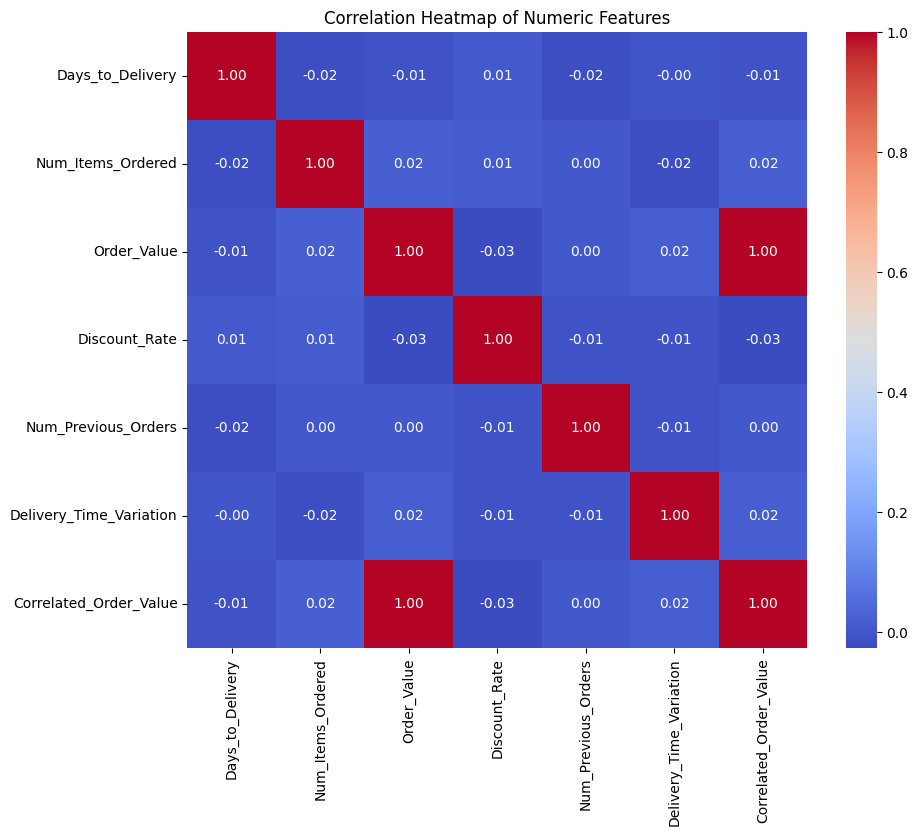

In [7]:
# Correlation Plot for Numeric Features
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

# Compute the correlation matrix
X = df[numeric_columns]
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Categorical column encoding using target and dummy encodings:

In [8]:
import pandas as pd

# Identify categorical columns
categorical_cols = ['Region', 'Order_Priority', 'Payment_Method', 'Product_Category']
non_product_category_cols = [col for col in categorical_cols if col != 'Product_Category']

# 'Not-Cancelled' is 0 and 'Cancelled' is 1
df['Order_Cancelled'] = df['Order_Cancelled'].map({'Not-Cancelled': 0, 'Cancelled': 1})

# Manual target encoding for 'Product_Category'
# Calculate the mean 'Order_Cancelled' for each category
product_category_means = df.groupby('Product_Category')['Order_Cancelled'].mean()

# Replace 'Product_Category' values with the corresponding mean
df['Product_Category'] = df['Product_Category'].map(product_category_means)

# Dummy encoding for other categorical columns
df_encoded = pd.get_dummies(df, columns=non_product_category_cols, drop_first=True)

# Store the resulting dataframe in a variable called 'dataCleaned'
dataCleaned = df_encoded

# Show the first few rows of the cleaned data
dataCleaned.head()


Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          4.176246               16.0   532.685241       0.100711   
1          4.573086                8.0   367.854514       0.117976   
2          5.096170               13.0   640.514439       0.292261   
3          4.327226               10.0   434.579153       0.243082   
4          9.823353                1.0   439.779464       0.123217   

   Num_Previous_Orders  Delivery_Time_Variation  Product_Category  \
0                  8.0                 1.601869          0.447059   
1                  2.0                 2.425666          0.592105   
2                  9.0                 2.622599          0.563636   
3                  8.0                 0.472247          0.545455   
4                  2.0                 0.805729          0.426230   

   Order_Cancelled  Correlated_Order_Value  Region_EMEA  Region_LATAM  \
0                0              505.651649        False         False   
1                0              348.849923        False         False   
2                0              611.311508        False         False   
3                1              412.479846        False          True   
4                0              418.039032         True         False   

   Region_North America  Order_Priority_Low  Order_Priority_Medium  \
0                 False                True                  False   
1                  True               False                   True   
2                 False               False                   True   
3                 False                True                  False   
4                 False               False                   True   

   Payment_Method_Bitcoin  Payment_Method_Credit Card  Payment_Method_PayPal  
0                   False                        True                  False  
1                   False                       False                   True  
2                   False                       False                   True  
3                   False                       False                   True  
4                   False                       False                  False

In [9]:
# Prepare data for logistic regression
X = dataCleaned.drop(columns=['Order_Cancelled'])
y = dataCleaned['Order_Cancelled']
X.head(2)

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          4.176246               16.0   532.685241       0.100711   
1          4.573086                8.0   367.854514       0.117976   

   Num_Previous_Orders  Delivery_Time_Variation  Product_Category  \
0                  8.0                 1.601869          0.447059   
1                  2.0                 2.425666          0.592105   

   Correlated_Order_Value  Region_EMEA  Region_LATAM  Region_North America  \
0              505.651649        False         False                 False   
1              348.849923        False         False                  True   

   Order_Priority_Low  Order_Priority_Medium  Payment_Method_Bitcoin  \
0                True                  False                   False   
1               False                   True                   False   

   Payment_Method_Credit Card  Payment_Method_PayPal  
0                        True                  False  
1                       False                   True

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, f1_score, make_scorer
# Importing RocCurveDisplay and PrecisionRecallDisplay instead
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
logreg_1 = LogisticRegression(max_iter=10000)
logreg_1.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = logreg_1.predict(X_train)
y_test_pred = logreg_1.predict(X_test)

# Get predicted probabilities for ROC-AUC, Precision-Recall, and Lift calculations
y_train_prob = logreg_1.predict_proba(X_train)
y_test_prob = logreg_1.predict_proba(X_test)

# Get classification reports for training and test sets
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Compute ROC-AUC scores for training and test sets
train_roc_auc = roc_auc_score(y_train, logreg_1.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, logreg_1.predict_proba(X_test)[:, 1])

# Compute confusion matrices for training and test sets
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# For later comprison
X_train_prev = X_train
y_train_prev = y_train
X_test_prev = X_test
y_test_prev = y_test

In [11]:
print(f"y_train_norm shape: {y_train.shape}")
print(f"y_train_pred shape: {y_train_pred.shape}")
print(f"y_test_norm shape: {y_test.shape}")
print(f"y_test_pred shape: {y_test_pred.shape}")

y_train_norm shape: (3200,)
y_train_pred shape: (3200,)
y_test_norm shape: (800,)
y_test_pred shape: (800,)


In [12]:
# Print classification report
from sklearn.metrics import classification_report

# Print the classification reports for the training and test sets
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1592
           1       0.56      0.59      0.57      1608

    accuracy                           0.56      3200
   macro avg       0.56      0.56      0.56      3200
weighted avg       0.56      0.56      0.56      3200


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       398
           1       0.56      0.57      0.57       402

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800



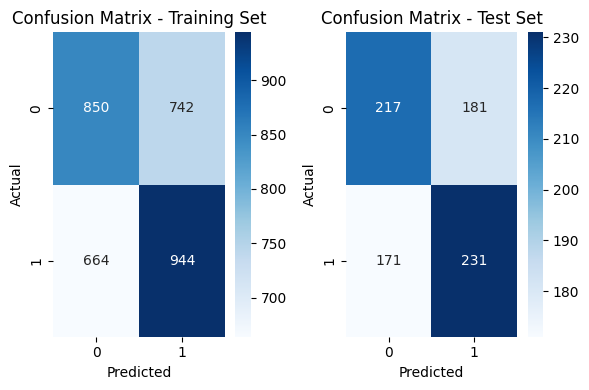

In [13]:
# Plot confusion matrix for training set
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# [TN FP​]
# [FN TP]


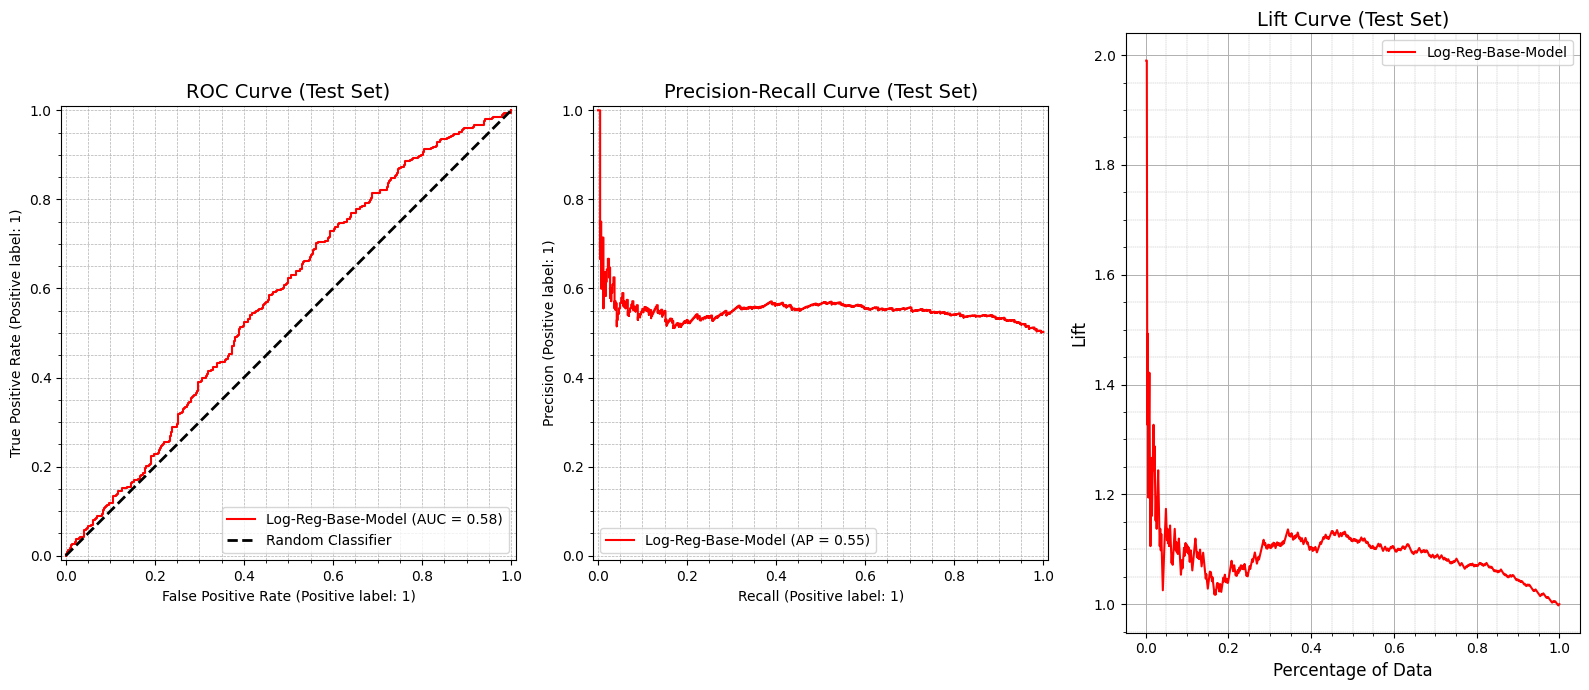

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

# Helper function to compute cumulative gain and lift
# Helper function to compute cumulative gain and lift
def compute_lift(y_true, y_prob):
    # Sort the predictions by the probabilities in descending order
    sorted_indices = np.argsort(-y_prob)

    # Get the values of y_true as a NumPy array to allow positional indexing
    y_true_values = y_true.values
    y_true_sorted = y_true_values[sorted_indices]

    # Cumulative sum of positive instances
    cumulative_positive = np.cumsum(y_true_sorted)
    total_positives = np.sum(y_true_values) # Use y_true_values here too

    # Cumulative gain is the ratio of cumulative positives to total positives
    cumulative_gain = cumulative_positive / total_positives

    # Lift is the cumulative gain divided by the baseline (which is the cumulative percentage of data)
    percentage_data = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)
    lift = cumulative_gain / percentage_data

    return percentage_data, lift

# Compute lift for the current and previous models
percentage_data_1, lift_1 = compute_lift(y_test, logreg_1.predict_proba(X_test)[:, 1])

plt.figure(figsize=(16, 7))

# ROC curve with green for the current model and red for the previous model
plt.subplot(1, 3, 1)
ax1 = plt.gca()
RocCurveDisplay.from_estimator(logreg_1, X_test, y_test, ax=ax1, color='red', name='Log-Reg-Base-Model')

# Adding diagonal line for a random classifier
ax1.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

ax1.set_title('ROC Curve (Test Set)', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.minorticks_on()
ax1.legend(loc='lower right')

# Precision-Recall curve with green for the current model and red for the previous model
plt.subplot(1, 3, 2)
ax2 = plt.gca()
PrecisionRecallDisplay.from_estimator(logreg_1, X_test, y_test, ax=ax2, color='red', name='Log-Reg-Base-Model')

ax2.set_title('Precision-Recall Curve (Test Set)', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.minorticks_on()

# Lift curve
plt.subplot(1, 3, 3)
plt.plot(percentage_data_1, lift_1, label='Log-Reg-Base-Model', color='red')

plt.title('Lift Curve (Test Set)', fontsize=14)
plt.xlabel('Percentage of Data', fontsize=12)
plt.ylabel('Lift', fontsize=12)

# Enable both major and minor ticks
plt.minorticks_on()

# Major and minor gridlines
plt.grid(True, which='major', linestyle='-', linewidth=0.7)  # Major gridlines
plt.grid(True, which='minor', linestyle='--', linewidth=0.3)  # Minor gridlines

plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [15]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, cohen_kappa_score, classification_report
import numpy as np

# Initialize the DataFrame to store the classification metrics
scores = pd.DataFrame(columns=[
    'Model',
    'Accuracy_Train', 'Precision_Train', 'Recall_Train', 'F1_Train', 'ROC_AUC_Train', 'Cohen_Kappa_Train',
    'Accuracy_Test', 'Precision_Test', 'Recall_Test', 'F1_Test', 'ROC_AUC_Test', 'Cohen_Kappa_Test'
])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
import pandas as pd

def get_classification_metrics(y_train, y_train_pred, y_train_prob, y_test, y_test_pred, y_test_prob, model_name, scores):
    # Train metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, zero_division=0)
    recall_train = recall_score(y_train, y_train_pred, zero_division=0)
    f1_train = f1_score(y_train, y_train_pred, zero_division=0)
    roc_auc_train = roc_auc_score(y_train, y_train_prob[:, 1]) if len(set(y_train)) == 2 else float('nan')
    cohen_kappa_train = cohen_kappa_score(y_train, y_train_pred)

    # Weighted and macro averages for training
    weighted_precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    weighted_recall_train = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    macro_precision_train = precision_score(y_train, y_train_pred, average='macro', zero_division=0)
    macro_recall_train = recall_score(y_train, y_train_pred, average='macro', zero_division=0)

    # Test metrics
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, zero_division=0)
    recall_test = recall_score(y_test, y_test_pred, zero_division=0)
    f1_test = f1_score(y_test, y_test_pred, zero_division=0)
    roc_auc_test = roc_auc_score(y_test, y_test_prob[:, 1]) if len(set(y_test)) == 2 else float('nan')
    cohen_kappa_test = cohen_kappa_score(y_test, y_test_pred)

    # Weighted and macro averages for test
    weighted_precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    weighted_recall_test = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    macro_precision_test = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
    macro_recall_test = recall_score(y_test, y_test_pred, average='macro', zero_division=0)

    # Create a DataFrame with new metrics
    new_metrics = pd.DataFrame({
        'Model': [model_name],
        'Accuracy_Train': [accuracy_train],
        'Precision_Train': [precision_train],
        'Recall_Train': [recall_train],
        'F1_Train': [f1_train],
        'ROC_AUC_Train': [roc_auc_train],
        'Cohen_Kappa_Train': [cohen_kappa_train],
        'Weighted_Precision_Train': [weighted_precision_train],
        'Weighted_Recall_Train': [weighted_recall_train],
        'Macro_Precision_Train': [macro_precision_train],
        'Macro_Recall_Train': [macro_recall_train],
        'Accuracy_Test': [accuracy_test],
        'Precision_Test': [precision_test],
        'Recall_Test': [recall_test],
        'F1_Test': [f1_test],
        'ROC_AUC_Test': [roc_auc_test],
        'Cohen_Kappa_Test': [cohen_kappa_test],
        'Weighted_Precision_Test': [weighted_precision_test],
        'Weighted_Recall_Test': [weighted_recall_test],
        'Macro_Precision_Test': [macro_precision_test],
        'Macro_Recall_Test': [macro_recall_test]
    })


    # Append the new metrics to the existing scores DataFrame
    scores = pd.concat([scores, new_metrics], ignore_index=True)

    return scores


In [16]:
# Assuming you have a trained classification model (e.g., logistic regression or any other binary classifier)
# Train the model

# Call the classification metrics function
scores = get_classification_metrics(
    y_train=y_train,
    y_train_pred=y_train_pred,
    y_train_prob=y_train_prob,
    y_test=y_test,
    y_test_pred=y_test_pred,
    y_test_prob=y_test_prob,
    model_name="Logistic Regression",
    scores=scores
)

# Display the updated scores DataFrame
scores


<ipython-input-15-2b0b5e3a7f8f>:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, new_metrics], ignore_index=True)


Model  Accuracy_Train  Precision_Train  Recall_Train  \
0  Logistic Regression        0.560625         0.559905      0.587065   

   F1_Train  ROC_AUC_Train  Cohen_Kappa_Train  Accuracy_Test  Precision_Test  \
0  0.573163       0.587135           0.121014           0.56         0.56068   

   Recall_Test  ...  ROC_AUC_Test  Cohen_Kappa_Test  Weighted_Precision_Train  \
0     0.574627  ...      0.576146          0.119868                  0.560662   

   Weighted_Recall_Train  Macro_Precision_Train  Macro_Recall_Train  \
0               0.560625               0.560666            0.560492   

   Weighted_Precision_Test  Weighted_Recall_Test  Macro_Precision_Test  \
0                 0.559982                  0.56              0.559979   

   Macro_Recall_Test  
0           0.559926  

[1 rows x 21 columns]

### Add model explainability:

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


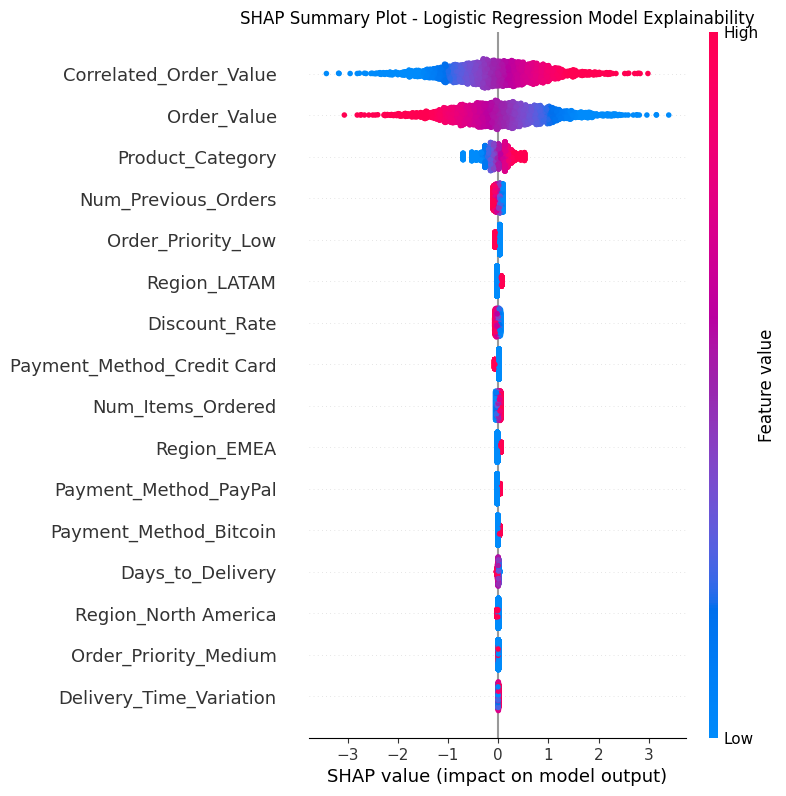

In [17]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# ... your existing code ...
model = logreg_1
# Convert shap_values to numeric if necessary:
# Iterate over columns and convert to numeric, if applicable
for col in X_train.columns:
    try:
        X_train[col] = pd.to_numeric(X_train[col])
    except ValueError:
        print(f"Column {col} could not be converted to numeric, skipping...")

# Sample background data to speed up SHAP calculations
# Use SHAP LinearExplainer, which is faster for linear models like Logistic Regression
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

# Convert shap_values data to numpy array with dtype=float64 before plotting
shap_values_numeric = shap_values.astype(np.float64)

# Plot the SHAP summary plot for model explainability
shap.summary_plot(shap_values_numeric, X_train, show=False)
plt.title('SHAP Summary Plot - Logistic Regression Model Explainability')
plt.show()

In [18]:
dataCleaned.columns

Index(['Days_to_Delivery', 'Num_Items_Ordered', 'Order_Value', 'Discount_Rate',
       'Num_Previous_Orders', 'Delivery_Time_Variation', 'Product_Category',
       'Order_Cancelled', 'Correlated_Order_Value', 'Region_EMEA',
       'Region_LATAM', 'Region_North America', 'Order_Priority_Low',
       'Order_Priority_Medium', 'Payment_Method_Bitcoin',
       'Payment_Method_Credit Card', 'Payment_Method_PayPal'],
      dtype='object')

### Check Multicolinearity: Compute the Variance Inflation Factor (VIF):

In [19]:
dataCleanedCopyFirst = dataCleaned.copy()
dataCleanedCopyFirst.head(4)

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          4.176246               16.0   532.685241       0.100711   
1          4.573086                8.0   367.854514       0.117976   
2          5.096170               13.0   640.514439       0.292261   
3          4.327226               10.0   434.579153       0.243082   

   Num_Previous_Orders  Delivery_Time_Variation  Product_Category  \
0                  8.0                 1.601869          0.447059   
1                  2.0                 2.425666          0.592105   
2                  9.0                 2.622599          0.563636   
3                  8.0                 0.472247          0.545455   

   Order_Cancelled  Correlated_Order_Value  Region_EMEA  Region_LATAM  \
0                0              505.651649        False         False   
1                0              348.849923        False         False   
2                0              611.311508        False         False   
3                1              412.479846        False          True   

   Region_North America  Order_Priority_Low  Order_Priority_Medium  \
0                 False                True                  False   
1                  True               False                   True   
2                 False               False                   True   
3                 False                True                  False   

   Payment_Method_Bitcoin  Payment_Method_Credit Card  Payment_Method_PayPal  
0                   False                        True                  False  
1                   False                       False                   True  
2                   False                       False                   True  
3                   False                       False                   True

In [20]:
# Import the necessary function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for all features
X = dataCleanedCopyFirst.drop(columns=['Order_Cancelled'])

# Select only numeric columns for VIF calculation
X = X.select_dtypes(include=np.number)  # Filter for numeric columns only

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIF values in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

# Display the top 4 features with the highest VIF
top_4_vif_features = vif_data_sorted.head(4)
top_4_vif_features


feature          VIF
2             Order_Value  9328.682624
7  Correlated_Order_Value  9309.035486
6        Product_Category    23.824029
0        Days_to_Delivery     6.810395

### Remove features with high VIF values:

In [21]:
# Remove the two features with the highest VIF (Order_Value and Correlated_Order_Value)
dataCleanedCopyFirst_reduced = dataCleanedCopyFirst.drop(columns=['Order_Value', 'Correlated_Order_Value'])


### Influential data points analysis:

In [22]:
import statsmodels.api as sm

# Adding a constant for logistic regression with statsmodels
# Logit() from statsmodels can only accept numeric features
X = dataCleanedCopyFirst_reduced.drop(['Order_Cancelled', 'Region_EMEA',	'Region_LATAM',	'Region_North America',	'Order_Priority_Low',	'Order_Priority_Medium',	'Payment_Method_Bitcoin',	'Payment_Method_Credit Card',	'Payment_Method_PayPal'], axis=1)
X_reduced = sm.add_constant(X)

# Target variable
y_reduced = dataCleanedCopyFirst_reduced['Order_Cancelled']
type(X_reduced), type(y_reduced)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [23]:
import statsmodels.api as sm
# Fit a logistic regression model using statsmodels to check for influential points
logit_model = sm.Logit(y_reduced, X_reduced)
result = logit_model.fit()

# Influence summary (e.g., Cook's distance)
influence = result.get_influence()

# Obtain the summary frame for influence measures
summary_frame = influence.summary_frame()

# Check for high influence points based on Cook's distance
high_influence_points = summary_frame[summary_frame['cooks_d'] > 4 / len(X_reduced)]

# Display high influence points
high_influence_points.head(4)  # Show top 4 and the count of high influence points


Optimization terminated successfully.
         Current function value: 0.681856
         Iterations 4


dfb_const  dfb_Days_to_Delivery  dfb_Num_Items_Ordered  \
262   0.046384             -0.042859               0.024424   
393   0.019264              0.043470               0.033182   
534   0.059447             -0.039639               0.018373   
551   0.033917              0.064100              -0.026861   

     dfb_Discount_Rate  dfb_Num_Previous_Orders  dfb_Delivery_Time_Variation  \
262          -0.035331                 0.030775                    -0.026125   
393           0.035903                 0.030103                     0.036136   
534           0.001860                 0.019389                     0.015256   
551           0.002745                -0.016950                    -0.007884   

     dfb_Product_Category   cooks_d  standard_resid  hat_diag  dffits_internal  
262             -0.040854  0.001072       -1.329572  0.004227        -0.086626  
393             -0.066826  0.001647        1.571497  0.004647         0.107382  
534             -0.066324  0.001071        1.500654  0.003317         0.086574  
551             -0.047827  0.001155        1.419833  0.003994         0.089913

In [24]:
high_influence_points.shape[0]

17

### Drop the high influence data points from the dataset

In [25]:
# Drop the high influence points based on Cook's distance
from sklearn.preprocessing import RobustScaler

# Dropping influential data points from X and y
X_reduced_no_infl_all_attribs = dataCleanedCopyFirst_reduced.drop(index=high_influence_points.index)

# Ensure y_reduced_no_infl_all_attribs only includes the target column 'Order_Cancelled'
y_reduced_no_infl_all_attribs = dataCleanedCopyFirst_reduced.loc[~dataCleanedCopyFirst_reduced.index.isin(high_influence_points.index), 'Order_Cancelled']

y_reduced_no_infl_all_attribs.shape


(3983,)

### Now apply normalization:

In [26]:
# Normalize the data using RobustScaler
from sklearn.preprocessing import RobustScaler

numeric_cols = X_reduced_no_infl_all_attribs.select_dtypes(include=['float64']).columns

# Step 2: Apply RobustScaler only to the numeric columns
scaler = RobustScaler()
X_reduced_no_infl_all_attribs_scaled = X_reduced_no_infl_all_attribs.copy()  # Make a copy to avoid modifying the original data

# Normalize only the numeric columns
X_reduced_no_infl_all_attribs_scaled[numeric_cols] = scaler.fit_transform(X_reduced_no_infl_all_attribs[numeric_cols])

# Step 3: Verify the update by displaying the first few rows
X_reduced_no_infl_all_attribs_scaled.head()

Days_to_Delivery  Num_Items_Ordered  Discount_Rate  Num_Previous_Orders  \
0         -0.325936                0.6      -0.602800                  0.8   
1         -0.175893               -0.2      -0.531301                 -0.4   
2          0.021882                0.3       0.190483                  1.0   
3         -0.268852                0.0      -0.013184                  0.8   
4          1.809206               -0.9      -0.509595                 -0.4   

   Delivery_Time_Variation  Product_Category  Order_Cancelled  Region_EMEA  \
0                 0.069172         -0.577278                0        False   
1                 0.612107          1.004329                0        False   
2                 0.741898          0.693900                0        False   
3                -0.675321          0.495643                1        False   
4                -0.455535         -0.804404                0         True   

   Region_LATAM  Region_North America  Order_Priority_Low  \
0         False                 False                True   
1         False                  True               False   
2         False                 False               False   
3          True                 False                True   
4         False                 False               False   

   Order_Priority_Medium  Payment_Method_Bitcoin  Payment_Method_Credit Card  \
0                  False                   False                        True   
1                   True                   False                       False   
2                   True                   False                       False   
3                  False                   False                       False   
4                   True                   False                       False   

   Payment_Method_PayPal  
0                  False  
1                   True  
2                   True  
3                   True  
4                  False

In [27]:
X_reduced_no_infl_all_attribs_scaled.shape, y_reduced_no_infl_all_attribs.shape

((3983, 15), (3983,))

In [28]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_reduced_no_infl_all_attribs_scaled, y_reduced_no_infl_all_attribs, test_size=0.2, random_state=123)

# Initialize and fit logistic regression model
logreg_2 = LogisticRegression(max_iter=10000)
logreg_2.fit(X_train_norm, y_train_norm)

# Predict on training and test data
y_train_pred2 = logreg_2.predict(X_train_norm)
y_test_pred2 = logreg_2.predict(X_test_norm)

# Get predicted probabilities for ROC-AUC, Precision-Recall, and Lift calculations
y_train_prob = logreg_2.predict_proba(X_train_norm)
y_test_prob = logreg_2.predict_proba(X_test_norm)

# Get classification reports for training and test sets
train_report = classification_report(y_train_norm, y_train_pred2, output_dict=True)
test_report = classification_report(y_test_norm, y_test_pred2, output_dict=True)

# Compute ROC-AUC scores for training and test sets
train_roc_auc = roc_auc_score(y_train_norm, logreg_2.predict_proba(X_train_norm)[:, 1])
test_roc_auc = roc_auc_score(y_test_norm, logreg_2.predict_proba(X_test_norm)[:, 1])

# Compute confusion matrices for training and test sets
train_conf_matrix = confusion_matrix(y_train_norm, y_train_pred2)
test_conf_matrix = confusion_matrix(y_test_norm, y_test_pred2)


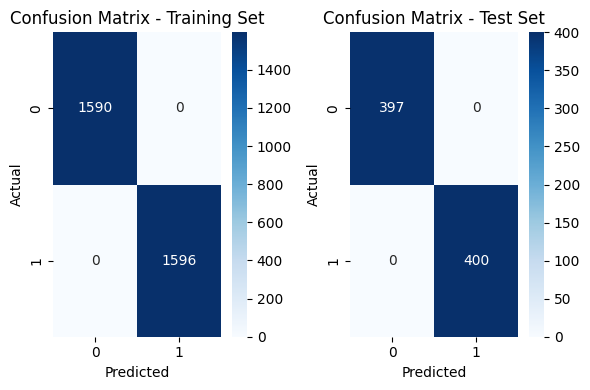

In [29]:
# Plot confusion matrix for training set
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [30]:
# Print classification report
from sklearn.metrics import classification_report

# Print the classification reports for the training and test sets
print("Classification Report - Training Set:")
print(classification_report(y_train_norm, y_train_pred2))

print("\nClassification Report - Test Set:")
print(classification_report(y_test_norm, y_test_pred2))

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1590
           1       1.00      1.00      1.00      1596

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       400

    accuracy                           1.00       797
   macro avg       1.00      1.00      1.00       797
weighted avg       1.00      1.00      1.00       797



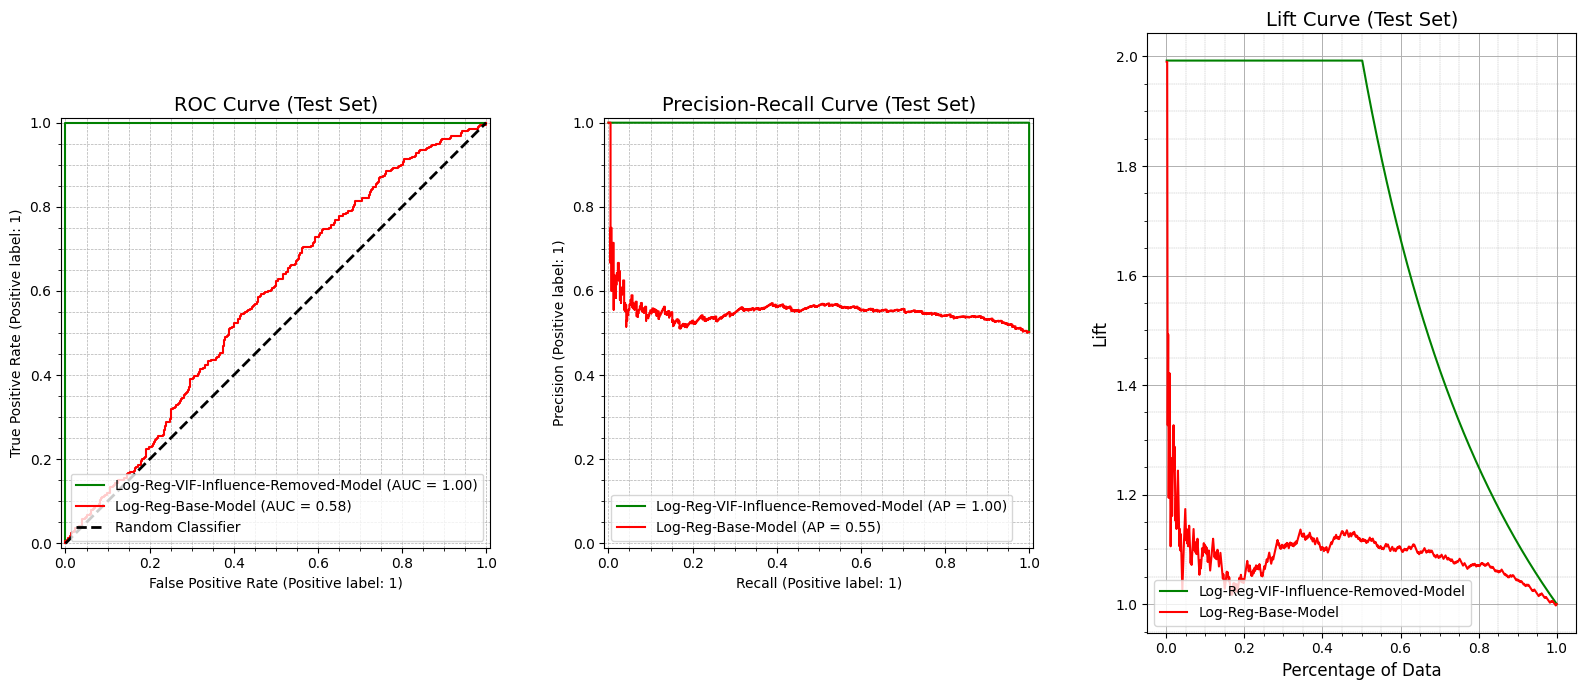

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

# Helper function to compute cumulative gain and lift
# Helper function to compute cumulative gain and lift
def compute_lift(y_true, y_prob):
    # Sort the predictions by the probabilities in descending order
    sorted_indices = np.argsort(-y_prob)

    # Get the values of y_true as a NumPy array to allow positional indexing
    y_true_values = y_true.values
    y_true_sorted = y_true_values[sorted_indices]

    # Cumulative sum of positive instances
    cumulative_positive = np.cumsum(y_true_sorted)
    total_positives = np.sum(y_true_values) # Use y_true_values here too

    # Cumulative gain is the ratio of cumulative positives to total positives
    cumulative_gain = cumulative_positive / total_positives

    # Lift is the cumulative gain divided by the baseline (which is the cumulative percentage of data)
    percentage_data = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)
    lift = cumulative_gain / percentage_data

    return percentage_data, lift

# Compute lift for the current and previous models
percentage_data_2, lift_2 = compute_lift(y_test_norm, logreg_2.predict_proba(X_test_norm)[:, 1])
percentage_data_1, lift_1 = compute_lift(y_test_prev, logreg_1.predict_proba(X_test_prev)[:, 1])

plt.figure(figsize=(16, 7))

# ROC curve with green for the current model and red for the previous model
plt.subplot(1, 3, 1)
ax1 = plt.gca()
RocCurveDisplay.from_estimator(logreg_2, X_test_norm, y_test_norm, ax=ax1, color='green', name='Log-Reg-VIF-Influence-Removed-Model')
RocCurveDisplay.from_estimator(logreg_1, X_test_prev, y_test_prev, ax=ax1, color='red', name='Log-Reg-Base-Model')

# Adding diagonal line for a random classifier
ax1.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

ax1.set_title('ROC Curve (Test Set)', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.minorticks_on()
ax1.legend(loc='lower right')

# Precision-Recall curve with green for the current model and red for the previous model
plt.subplot(1, 3, 2)
ax2 = plt.gca()
PrecisionRecallDisplay.from_estimator(logreg_2, X_test_norm, y_test_norm, ax=ax2, color='green', name='Log-Reg-VIF-Influence-Removed-Model')
PrecisionRecallDisplay.from_estimator(logreg_1, X_test_prev, y_test_prev, ax=ax2, color='red', name='Log-Reg-Base-Model')

ax2.set_title('Precision-Recall Curve (Test Set)', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.minorticks_on()

# Lift curve
plt.subplot(1, 3, 3)
plt.plot(percentage_data_2, lift_2, label='Log-Reg-VIF-Influence-Removed-Model', color='green')
plt.plot(percentage_data_1, lift_1, label='Log-Reg-Base-Model', color='red')

plt.title('Lift Curve (Test Set)', fontsize=14)
plt.xlabel('Percentage of Data', fontsize=12)
plt.ylabel('Lift', fontsize=12)

# Enable both major and minor ticks
plt.minorticks_on()

# Major and minor gridlines
plt.grid(True, which='major', linestyle='-', linewidth=0.7)  # Major gridlines
plt.grid(True, which='minor', linestyle='--', linewidth=0.3)  # Minor gridlines

plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [32]:
# Call the classification metrics function
scores = get_classification_metrics(
    y_train=y_train_norm,
    y_train_pred=y_train_pred2,
    y_train_prob=y_train_prob,
    y_test=y_test_norm,
    y_test_pred=y_test_pred2,
    y_test_prob=y_test_prob,
    model_name="Logistic-Regr + VIF + Infl.removal",
    scores=scores
)

# Display the updated scores DataFrame
scores

Model  Accuracy_Train  Precision_Train  \
0                 Logistic Regression        0.560625         0.559905   
1  Logistic-Regr + VIF + Infl.removal        1.000000         1.000000   

   Recall_Train  F1_Train  ROC_AUC_Train  Cohen_Kappa_Train  Accuracy_Test  \
0      0.587065  0.573163       0.587135           0.121014           0.56   
1      1.000000  1.000000       1.000000           1.000000           1.00   

   Precision_Test  Recall_Test  ...  ROC_AUC_Test  Cohen_Kappa_Test  \
0         0.56068     0.574627  ...      0.576146          0.119868   
1         1.00000     1.000000  ...      1.000000          1.000000   

   Weighted_Precision_Train  Weighted_Recall_Train  Macro_Precision_Train  \
0                  0.560662               0.560625               0.560666   
1                  1.000000               1.000000               1.000000   

   Macro_Recall_Train  Weighted_Precision_Test  Weighted_Recall_Test  \
0            0.560492                 0.559982                  0.56   
1            1.000000                 1.000000                  1.00   

   Macro_Precision_Test  Macro_Recall_Test  
0              0.559979           0.559926  
1              1.000000           1.000000  

[2 rows x 21 columns]

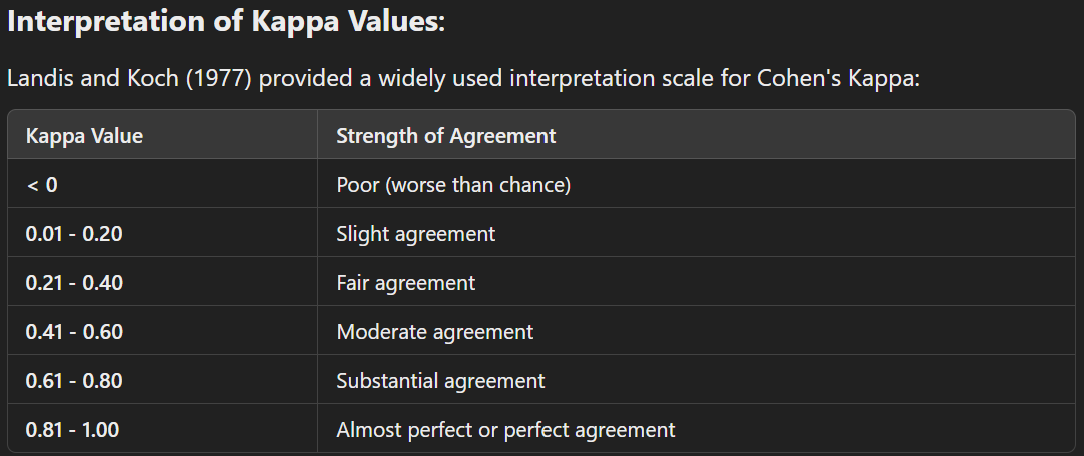

#### `In-Class Activity - 2:` Duration: 15 minutes
 Train a logistic regression model and interpret the predicted probabilities for a small set of instances. Learners will reflect on the confidence of the model and how it assigns probabilities to different classes.

`Steps for the Activity:`

`Train the Model:`
- Train a logistic regression model using the provided dataset.

`Predict Probabilities:`
- Use the model to predict the class probabilities for a small subset of test data (e.g., 5 instances).

`Interpret the Probabilities:`
- Print the predicted probabilities to interpret what they mean. For instance, discuss how confident the model is about its prediction and which class is most likely.

In [33]:
## Solution:
from sklearn.linear_model import LogisticRegression

# Step 1: Train the logistic regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Step 2: Predict class probabilities for a small subset (first 5 test instances)
y_prob = log_reg.predict_proba(X_test[:5])

# Step 3: Display the predicted probabilities and interpret them
print("Predicted probabilities for the first 5 test instances:")
print(y_prob)

# Step 4: Encourage learners to interpret
# e.g., "For instance 1, the model is x% confident it belongs to Class 1."


Predicted probabilities for the first 5 test instances:
[[0.47424202 0.52575798]
 [0.49941334 0.50058666]
 [0.52596488 0.47403512]
 [0.54003617 0.45996383]
 [0.42421628 0.57578372]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
